In [2]:
# 2.1. Структура для HW06 

from __future__ import annotations

import json
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    confusion_matrix, RocCurveDisplay
)

from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, StackingClassifier
from sklearn.inspection import permutation_importance

import joblib

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

ARTIFACTS_DIR = Path("artifacts")
FIGURES_DIR = ARTIFACTS_DIR / "figures"

FIGURES_DIR.mkdir(parents=True, exist_ok=True)

print("Artifacts dir:", ARTIFACTS_DIR.resolve())
print("Figures dir:", FIGURES_DIR.resolve())

Artifacts dir: /Users/damir/ml/seyyestyq-aie-student-damir/homeworks/HW06/artifacts
Figures dir: /Users/damir/ml/seyyestyq-aie-student-damir/homeworks/HW06/artifacts/figures


(18000, 39)


,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f29,f30,f31,f32,f33,f34,f35,x_int_1,x_int_2,target
0,1,-0.149235,-2.826966,-0.522901,-4.198449,1.364943,0.815043,-1.195518,-1.932232,2.396353,...,-0.159323,0.448015,0.572745,0.149916,0.878392,-0.679733,1.412751,0.421883,9.217167,1
1,2,-1.966180,-4.877542,0.268367,-9.607791,0.097149,1.347185,-3.872575,-0.395117,1.710068,...,-0.389212,1.383794,0.169876,0.043969,-0.963545,1.006643,-2.488690,9.590124,24.772826,0
2,3,-0.555964,-0.999920,0.209673,-14.119498,-1.808950,-0.006222,-4.651108,0.911944,-0.289037,...,-1.383970,3.044321,-0.182864,1.425649,-8.418598,-4.629754,-0.439798,0.555919,41.800517,0
3,4,-2.049199,-5.600713,-1.664677,-6.263893,-5.224455,0.848351,1.407210,-0.542080,0.119102,...,-2.713080,2.762637,-0.520796,-0.142455,1.668338,2.292810,-10.744916,11.476977,65.315860,0
4,5,-0.220556,4.889479,-2.235840,6.450046,0.774389,-2.382625,2.584816,4.211856,-0.317889,...,-1.302872,2.478862,1.528610,1.098131,3.547087,2.517757,-9.364106,-1.078404,93.017870,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 39 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       18000 non-null  int64  
 1   f01      18000 non-null  float64
 2   f02      18000 non-null  float64
 3   f03      18000 non-null  float64
 4   f04      18000 non-null  float64
 5   f05      18000 non-null  float64
 6   f06      18000 non-null  float64
 7   f07      18000 non-null  float64
 8   f08      18000 non-null  float64
 9   f09      18000 non-null  float64
 10  f10      18000 non-null  float64
 11  f11      18000 non-null  float64
 12  f12      18000 non-null  float64
 13  f13      18000 non-null  float64
 14  f14      18000 non-null  float64
 15  f15      18000 non-null  float64
 16  f16      18000 non-null  float64
 17  f17      18000 non-null  float64
 18  f18      18000 non-null  float64
 19  f19      18000 non-null  float64
 20  f20      18000 non-null  float64
 21  f21      180

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f29,f30,f31,f32,f33,f34,f35,x_int_1,x_int_2,target
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,1.800000e+04,18000.000000
mean,9000.500000,-0.418555,0.614251,0.004559,0.059000,0.405086,0.012123,-0.283473,-0.266880,0.255107,...,-0.139825,0.108568,0.007238,0.000904,-0.716862,-0.274520,0.344991,1.517339,2.576221e+01,0.262611
std,5196.296758,2.178005,3.926778,1.000134,5.713672,2.497581,0.987226,2.193891,2.081431,2.225776,...,2.148834,2.234315,0.997861,1.002115,3.913704,2.482890,4.927315,10.630850,5.423748e+01,0.440065
min,1.000000,-10.014698,-15.510323,-4.031762,-23.663256,-12.289308,-3.741536,-9.591425,-8.293319,-13.655742,...,-8.171469,-9.214171,-3.937091,-3.963063,-19.389908,-10.031559,-20.768452,-107.788145,1.895059e-07,0.000000
25%,4500.750000,-1.866134,-2.048192,-0.673127,-3.544964,-1.153000,-0.653090,-1.743214,-1.688121,-1.177480,...,-1.589638,-1.369266,-0.663023,-0.684164,-3.286842,-1.897893,-2.752685,-2.018750,1.226029e+00,0.000000
50%,9000.500000,-0.465100,0.600291,0.003581,0.072826,0.485625,0.018765,-0.251263,-0.302463,0.350739,...,-0.204785,0.158715,0.001912,-0.003157,-0.618472,-0.339901,0.573153,0.318011,6.581865e+00,0.000000
75%,13500.250000,0.966393,3.229850,0.671390,3.689490,2.075739,0.689304,1.195481,1.109589,1.764113,...,1.254595,1.600671,0.677296,0.676558,1.948803,1.314163,3.649794,4.212111,2.576847e+01,1.000000
max,18000.000000,9.589975,15.417329,3.817025,26.815691,10.665184,3.528280,7.794627,8.892834,8.699629,...,9.290667,8.794320,4.341030,3.781380,14.065595,10.639974,20.226291,94.891804,1.103449e+03,1.000000


target
0    0.737389
1    0.262611
Name: proportion, dtype: float64


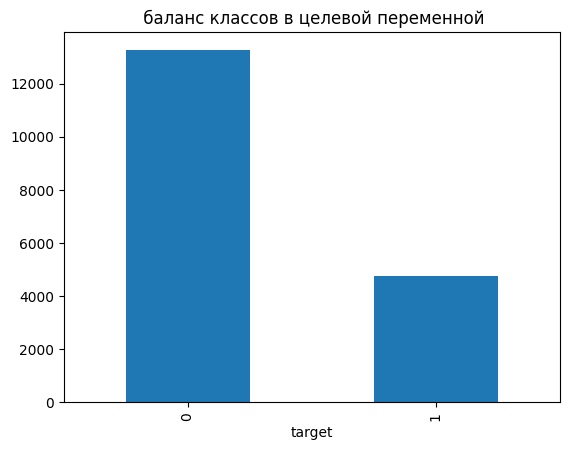


версия x (18000, 37)
 версия y (18000,)


In [1]:
#задание 2.3.1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
filename = 'S06-hw-dataset-02.csv' 
df = pd.read_csv(filename)
print(df.shape)
display(df.head())
df.info()
print(df.isna().sum())
display(df.describe())
print(df['target'].value_counts(normalize=True))
df['target'].value_counts().plot(kind='bar', title=' баланс классов в целевой переменной')
plt.show()
if 'id' in df.columns:
    X = df.drop(columns=['id', 'target'])
else:
    X = df.drop(columns=['target'])

y = df['target']

print(f"\nверсия x {X.shape}")
print(f" версия y {y.shape}")

In [2]:

# заданеи 2.3.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=42, 
    stratify=y
)

print(f"Train shape: X={X_train.shape}, y={y_train.shape}")
print(f"Test shape:  X={X_test.shape},  y={y_test.shape}")

# Проверка, что баланс классов сохранился
print("\n--- Class balance in Train ---")
print(y_train.value_counts(normalize=True))

print("\n--- Class balance in Test ---")
print(y_test.value_counts(normalize=True))

#random_state Seed:42 нужно чтобы при каждом запуске разбиение было одинаковым
#stratify=y чтобы сохранить баланс классов в таргете при разбиении, то есть гарантирует что доля классов в train и test будет такой же, как в исходном датасете

Train shape: X=(13500, 37), y=(13500,)
Test shape:  X=(4500, 37),  y=(4500,)

--- Class balance in Train ---
target
0    0.737407
1    0.262593
Name: proportion, dtype: float64

--- Class balance in Test ---
target
0    0.737333
1    0.262667
Name: proportion, dtype: float64


In [3]:
# задание 2.3.3. Baseline Models
def print_metrics(y_true, y_pred, y_proba=None, model_name="Model"):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred) 
    
    print(model_name)
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    if y_proba is not None:
        roc = roc_auc_score(y_true, y_proba)
        print(f"ROC AUC:  {roc:.4f}")
# Dummy Classifier
# strategy='most_frequent' всегда предсказывает мажоритарный класс
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
# Предсказания
y_pred_dummy = dummy.predict(X_test)
# У Dummy вероятности для ROC AUC
y_proba_dummy = dummy.predict_proba(X_test)[:, 1] 
print_metrics(y_test, y_pred_dummy, y_proba_dummy, "Dummy Classifier")
# Logistic Regression
logreg_pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('logreg', LogisticRegression(random_state=42))
])
logreg_pipe.fit(X_train, y_train)

y_pred_lr = logreg_pipe.predict(X_test)
y_proba_lr = logreg_pipe.predict_proba(X_test)[:, 1] 

print_metrics(y_test, y_pred_lr, y_proba_lr, "Logistic Regression")

Dummy Classifier
Accuracy: 0.7373
F1 Score: 0.0000
ROC AUC:  0.5000
Logistic Regression
Accuracy: 0.8162
F1 Score: 0.5717
ROC AUC:  0.8009


In [4]:
#задание 2.3.4.
best_models = {}
# Random Forest Classifier 
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200],
    'min_samples_leaf': [1, 5],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}

print("training random forest...")
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_models['Random Forest'] = grid_rf.best_estimator_
print(f"params: {grid_rf.best_params_}")
print(f"CV score (F1): {grid_rf.best_score_:.4f}\n")

# Decision Tree Classifier 
dt = DecisionTreeClassifier(random_state=42)
dt_params = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

print("training decision Tree")
grid_dt = GridSearchCV(dt, dt_params, cv=5, scoring='f1', n_jobs=-1)
grid_dt.fit(X_train, y_train)

best_models['decision Tree'] = grid_dt.best_estimator_
print(f" params: {grid_dt.best_params_}")
print(f" CV score (F1): {grid_dt.best_score_:.4f}\n")

# Gradient Boosting Classifier

gb = GradientBoostingClassifier(random_state=42)
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5]
}
print("training Gradient Boosting")
grid_gb = GridSearchCV(gb, gb_params, cv=5, scoring='f1', n_jobs=-1)
grid_gb.fit(X_train, y_train)
best_models['gradient Boosting'] = grid_gb.best_estimator_
print(f" params: {grid_gb.best_params_}")
print(f" CV score (F1): {grid_gb.best_score_:.4f}\n")


training random forest...


params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}
CV score (F1): 0.7521

training decision Tree
 params: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10}
 CV score (F1): 0.6494

training Gradient Boosting
 params: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
 CV score (F1): 0.7991



Random Forest
accuracy: 0.8927, f1: 0.7601, roc auc: 0.9286
decision Tree
accuracy: 0.8342, f1: 0.6627, roc auc: 0.8224
gradient Boosting
accuracy: 0.9040, f1: 0.8009, roc auc: 0.9259


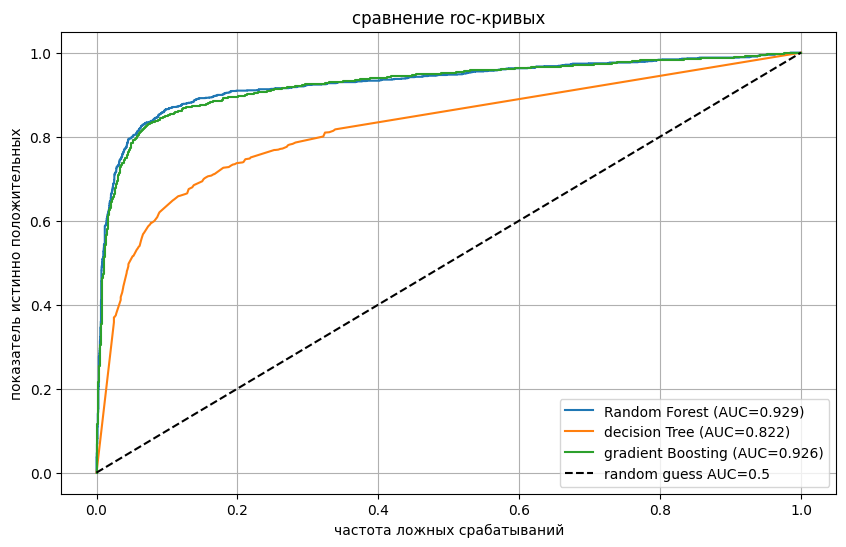

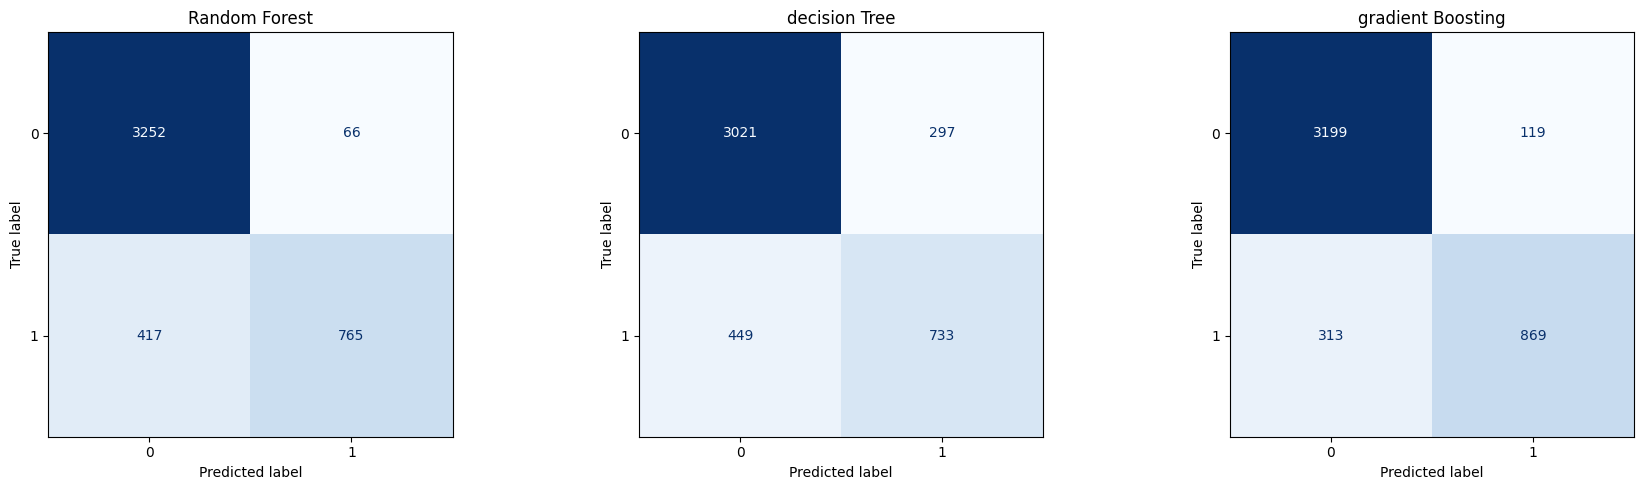

вывод метрик всех моделей в таблице


,accuracy,f1,roc_auc
Random Forest,0.892667,0.760060,0.928624
gradient Boosting,0.904000,0.800922,0.925892
decision Tree,0.834222,0.662749,0.822389


In [5]:
# задание 2.3.5

final_metrics = {}

fig_roc, ax_roc = plt.subplots(figsize=(10, 6))
fig_cm, axes_cm = plt.subplots(1, 3, figsize=(18, 5)) 

for i, (name, model) in enumerate(best_models.items()):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] 
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    final_metrics[name] = {
        'accuracy': acc,
        'f1': f1,
        'roc_auc': roc_auc
    }
    
    print(name)
    print(f"accuracy: {acc:.4f}, f1: {f1:.4f}, roc auc: {roc_auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    ax_roc.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")

    cm_display = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, ax=axes_cm[i], colorbar=False, cmap='Blues'
    )
    axes_cm[i].set_title(name)

ax_roc.plot([0, 1], [0, 1], 'k--', label='random guess AUC=0.5')
ax_roc.set_xlabel('частота ложных срабатываний')
ax_roc.set_ylabel('показатель истинно положительных')
ax_roc.set_title('сравнение roc-кривых')
ax_roc.legend()
ax_roc.grid(True)

plt.tight_layout()
plt.show()

print("вывод метрик всех моделей в таблице")
results_df = pd.DataFrame(final_metrics).T
display(results_df.sort_values(by='roc_auc', ascending=False))

лучшая модель: Random Forest


/var/folders/g5/g_jqht053_j0x27fn094b_0r0000gn/T/ipykernel_68591/1830139334.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


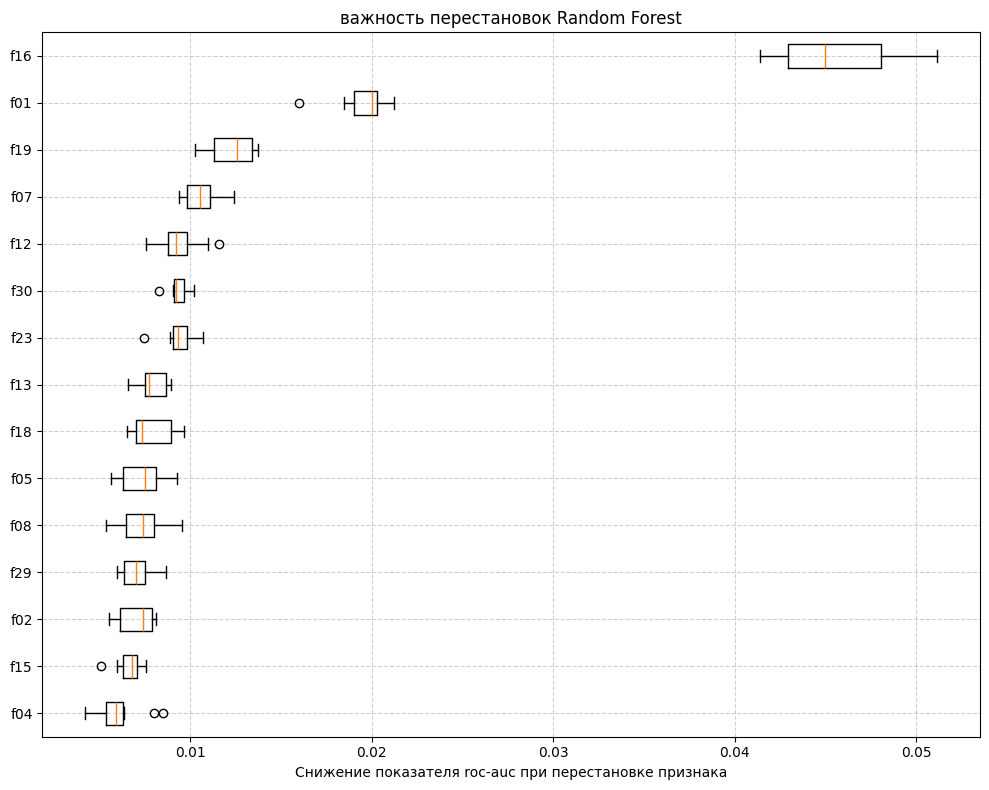

Важные признаки
f16                 : 0.0456 +/- 0.0030
f01                 : 0.0195 +/- 0.0014
f19                 : 0.0124 +/- 0.0012
f07                 : 0.0105 +/- 0.0009
f12                 : 0.0094 +/- 0.0011
f30                 : 0.0094 +/- 0.0005
f23                 : 0.0093 +/- 0.0008
f13                 : 0.0079 +/- 0.0008
f18                 : 0.0079 +/- 0.0011
f05                 : 0.0074 +/- 0.0012


In [6]:
#задание 2.3.6.
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

best_model_name = max(final_metrics, key=lambda k: final_metrics[k]['roc_auc'])
best_model = best_models[best_model_name]

print(f"лучшая модель: {best_model_name}")

r = permutation_importance(
    best_model, X_test, y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1,
    scoring='roc_auc'  
)

sorted_idx = r.importances_mean.argsort()

top_idx = sorted_idx[-15:]

fig, ax = plt.subplots(figsize=(10, 8))
ax.boxplot(
    r.importances[top_idx].T,
    vert=False,
    labels=X_test.columns[top_idx]
)
ax.set_title(f"важность перестановок {best_model_name}")
ax.set_xlabel("Снижение показателя roc-auc при перестановке признака")
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
print("Важные признаки")
for i in sorted_idx[::-1][:10]:
    mean_imp = r.importances_mean[i]
    std_imp = r.importances_std[i]
    print(f"{X_test.columns[i]:<20}: {mean_imp:.4f} +/- {std_imp:.4f}")

In [7]:
#задание 2.4.
import os
import json
import joblib
base_path = 'artifacts'
figures_path = os.path.join(base_path, 'figures')
print("папка создана:", figures_path)
os.makedirs(figures_path, exist_ok=True)
metrics_file = os.path.join(base_path, 'metrics_test.json')
with open(metrics_file, 'w') as f:
    json.dump(final_metrics, f, indent=4)
print(f"Сохранено: {metrics_file}")
search_summary = {}
def extract_grid_results(model_name, grid_object):
    if grid_object is not None:
        return {
            'best_params': grid_object.best_params_,
            'best_cv_score': grid_object.best_score_
        }
    return None
try:
    search_summary['Decision Tree'] = extract_grid_results('Decision Tree', grid_dt)
    search_summary['Random Forest'] = extract_grid_results('Random Forest', grid_rf)
    search_summary['Gradient Boosting'] = extract_grid_results('Gradient Boosting', grid_gb)
    
    summary_file = os.path.join(base_path, 'search_summaries.json')
    with open(summary_file, 'w') as f:
        json.dump(search_summary, f, indent=4)
    print(f"Сохранено: {summary_file}")
except NameError:
    print(" объекты GridSearch не найдены. Файл search_summaries.json не сохранен.")

best_name = max(final_metrics, key=lambda k: final_metrics[k]['roc_auc'])
best_model_obj = best_models[best_name]

model_path = os.path.join(base_path, 'best_model.joblib')
joblib.dump(best_model_obj, model_path)
print(f"Сохранено: {model_path}")

meta_data = {
    'best_model_name': best_name,
    'test_metrics': final_metrics[best_name],
    'params': best_model_obj.get_params()
}
meta_path = os.path.join(base_path, 'best_model_meta.json')
with open(meta_path, 'w') as f:
    json.dump(meta_data, f, indent=4, default=str) 
print(f"Сохранено: {meta_path}")

plt.figure(figsize=(10, 6))
for name, model in best_models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = final_metrics[name]['roc_auc']
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(figures_path, 'roc_curve.png')) 
plt.close() 
print("график сохранен: roc_curve.png")

plt.figure(figsize=(6, 5))
ConfusionMatrixDisplay.from_estimator(best_model_obj, X_test, y_test, cmap='Blues', colorbar=False)
plt.title(f"Confusion Matrix - {best_name}")
plt.savefig(os.path.join(figures_path, 'confusion_matrix.png'))
plt.close()
print("график сохранен: confusion_matrix.png")

if 'r' in locals(): 
    sorted_idx = r.importances_mean.argsort()
    top_idx = sorted_idx[-15:]
    
    plt.figure(figsize=(10, 8))
    plt.boxplot(r.importances[top_idx].T, vert=False, labels=X_test.columns[top_idx])
    plt.title(f"Feature Importance - {best_name}")
    plt.tight_layout()
    plt.savefig(os.path.join(figures_path, 'feature_importance.png'))
    plt.close()
    print("график сохранен: feature_importance.png")
else:
    print("(Важность перестановок) не найден в памяти, график не сохранен.")


папка создана: artifacts/figures
Сохранено: artifacts/metrics_test.json
Сохранено: artifacts/search_summaries.json
Сохранено: artifacts/best_model.joblib
Сохранено: artifacts/best_model_meta.json
график сохранен: roc_curve.png
график сохранен: confusion_matrix.png
график сохранен: feature_importance.png


/var/folders/g5/g_jqht053_j0x27fn094b_0r0000gn/T/ipykernel_68591/90289045.py:79: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(r.importances[top_idx].T, vert=False, labels=X_test.columns[top_idx])


<Figure size 600x500 with 0 Axes>